In [3]:
import pandas as pd
data = pd.read_csv('/Users/suchirnaik/Documents/NLPSARACSM /news-Headlines-reddit/new_headline_saracasm.csv')

In [5]:
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [12]:
data['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [10]:
data

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset


# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['headline'])
y = data['is_sarcastic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8389238294898672
Confusion Matrix:
[[2498  497]
 [ 425 2304]]


In [7]:
from sklearn.metrics import classification_report, plot_confusion_matrix

/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


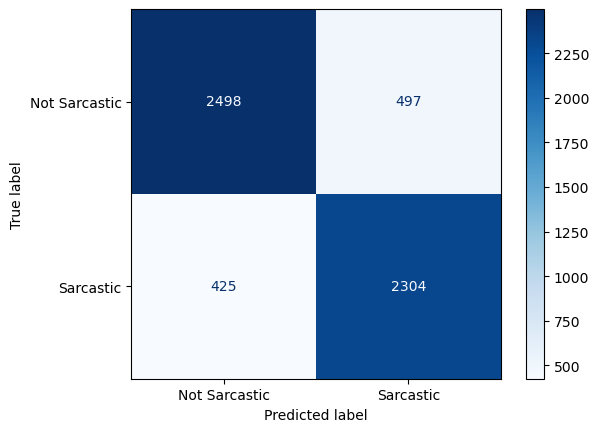

In [9]:
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(svm_classifier, X_test, y_test,
                             display_labels=['Not Sarcastic', 'Sarcastic'],
                             cmap=plt.cm.Blues,
                             normalize=None)

In [11]:
report = classification_report(y_test, y_pred, target_names=['Not Sarcastic', 'Sarcastic'])


In [13]:
print("Classification Report:")
print(report)

Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.85      0.83      0.84      2995
    Sarcastic       0.82      0.84      0.83      2729

     accuracy                           0.84      5724
    macro avg       0.84      0.84      0.84      5724
 weighted avg       0.84      0.84      0.84      5724



In [ ]:
###XG Boost

In [15]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.7891334730957372
F1 Score: 0.7940624466814536
Precision: 0.7429757343550447
Recall: 0.8526932942469769
Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.84      0.73      0.78      2995
    Sarcastic       0.74      0.85      0.79      2729

     accuracy                           0.79      5724
    macro avg       0.79      0.79      0.79      5724
 weighted avg       0.80      0.79      0.79      5724



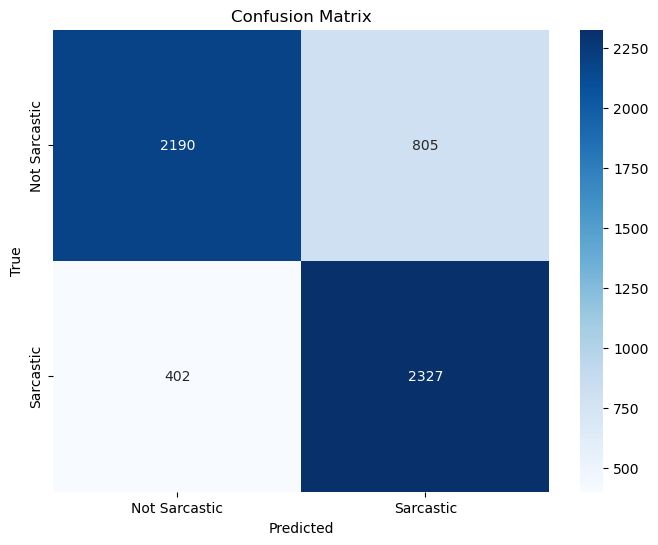

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset


# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['headline'])
y = data['is_sarcastic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Sarcastic', 'Sarcastic'])

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Classification Report:")
print(report)

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a chart
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
### Decision tree 

Accuracy: 0.7370719776380154
F1 Score: 0.7264133793855663
Precision: 0.7207792207792207
Recall: 0.7321363136680102
Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.75      0.74      0.75      2995
    Sarcastic       0.72      0.73      0.73      2729

     accuracy                           0.74      5724
    macro avg       0.74      0.74      0.74      5724
 weighted avg       0.74      0.74      0.74      5724



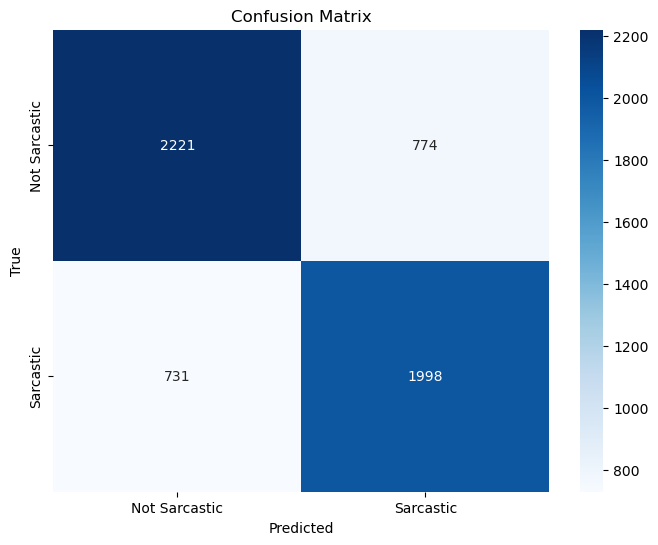

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['headline'])
y = data['is_sarcastic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Sarcastic', 'Sarcastic'])

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Classification Report:")
print(report)

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a chart
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
### Random forest 

Accuracy: 0.7955974842767296
F1 Score: 0.7947368421052632
Precision: 0.7623695725345002
Recall: 0.8299743495786002
Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.83      0.76      0.80      2995
    Sarcastic       0.76      0.83      0.79      2729

     accuracy                           0.80      5724
    macro avg       0.80      0.80      0.80      5724
 weighted avg       0.80      0.80      0.80      5724



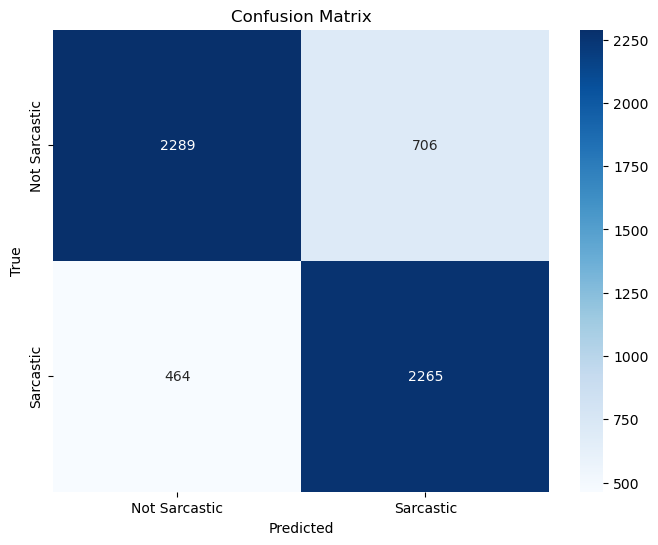

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['headline'])
y = data['is_sarcastic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Sarcastic', 'Sarcastic'])

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Classification Report:")
print(report)

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a chart
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
### KNN

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [8]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['headline'])
y = data['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [10]:
y_pred = knn_classifier.predict(X_test)


/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Accuracy: 0.49947589098532497
F1 Score: 0.6456400742115027
Precision: 0.4873039581777446
Recall: 0.9563942836203737


In [ ]:
### Roberta

In [ ]:
import torch
torch.cuda.is_available()

In [5]:
df = data

In [8]:
df = df.sample(n=1000)

In [9]:
df['is_sarcastic'].value_counts()

0    548
1    452
Name: is_sarcastic, dtype: int64

In [33]:
pip install --upgrade torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 MB 21.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1 requires torch==2.0.0, but you have torch 2.1.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
torch.cuda.is_available()

False

In [4]:
from torch.utils.data import DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
from torch.utils.data import TensorDataset


In [14]:
# Tokenize the text data
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
encoded_data = tokenizer(df['headline'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Prepare labels
labels = torch.tensor(df['is_sarcastic'].tolist())

# Split the data
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)

# Define a DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Load the pre-trained model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Define the loss function and optimizer
import torch.nn as nn
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

from tqdm.notebook import tqdm



OSError: roberta-base-uncased is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.

Epoch 1/3


Epoch 1:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/3


Epoch 2:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/3


Epoch 3:   0%|          | 0/50 [00:00<?, ?it/s]

Accuracy: 0.52
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


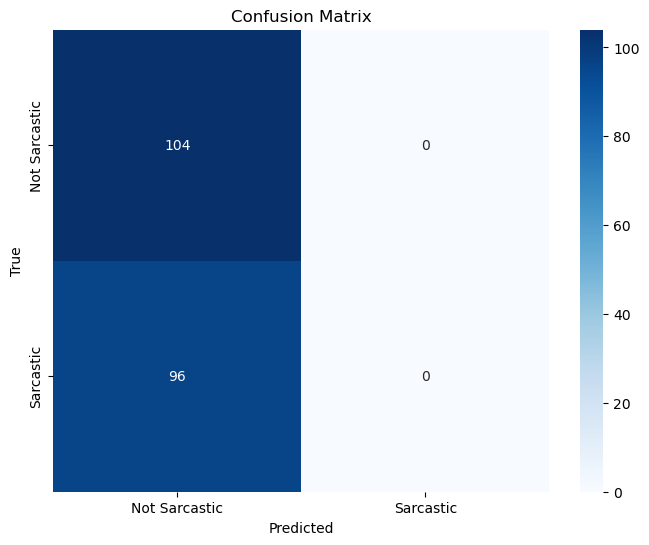

Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.52      1.00      0.68       104
    Sarcastic       0.00      0.00      0.00        96

     accuracy                           0.52       200
    macro avg       0.26      0.50      0.34       200
 weighted avg       0.27      0.52      0.36       200



/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Training loop
model.train()
total_epochs = 3

for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")

    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model.eval()
with torch.no_grad():
    outputs = model(test_inputs, labels=test_labels)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

accuracy = accuracy_score(test_labels, predicted_labels)
f1 = f1_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

# Generate and plot the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
labels = ['Not Sarcastic', 'Sarcastic']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate and print the classification report
report = classification_report(test_labels, predicted_labels, target_names=labels)
print("Classification Report:")
print(report)


In [ ]:
### Testing Sarc dataset

In [103]:
import pandas as pd
data = pd.read_csv('/Users/suchirnaik/Downloads/SARC/sarcasm_subset.csv')

In [16]:
data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,Bushie the other Bushie the next Bushie the af...,selicos,politics,606,-1,-1,2016-10,2016-10-13 02:39:41,"Don't you mean, Bushie the Younger?"
1,1,Congrats on getting such damage before they we...,SenGenketsu,Robocraft,1,-1,-1,2016-10,2016-10-27 16:51:51,"So, Flak will be a thing again? Than i have to..."
2,0,Keeper of the Grove too,pucykoks,hearthstone,14,14,0,2016-09,2016-09-13 21:33:07,Especially when you compare it to dalaran Mage...
3,1,'This would be like my form of alcoholism' cle...,redditzendave,politics,7,-1,-1,2016-10,2016-10-21 19:16:31,See It: Trump hires teen because she's beautif...
4,1,Great input,Karieo,wow,2,2,0,2016-09,2016-09-19 20:54:15,you swap to druid.
...,...,...,...,...,...,...,...,...,...,...
99995,0,"Alright lmao, a bit *too* gay for my tastes",ScootaliciousScooter,teenagers,2,-1,-1,2016-12,2016-12-30 04:05:43,"This is just getting too far, sort of like you..."
99996,1,Rip this is the farthest I've ever gotten,EmceeSexy,teenagers,1,-1,-1,2016-12,2016-12-05 02:18:19,ok
99997,1,Was expecting a tutorial on how to doxx your d...,Orrangejuiced,h1z1,3,-1,-1,2016-12,2016-12-07 04:48:41,Ninja tutorial
99998,1,He just wants more time to prepare for playing...,bamachine,CFB,2,-1,-1,2016-11,2016-11-23 03:55:23,Coaches Poll: Most feel Jimbo Fisher leaves fo...


In [23]:
data['combined'] = data['parent_comment']+ data['comment']

In [18]:
data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,combined
0,0,Bushie the other Bushie the next Bushie the af...,selicos,politics,606,-1,-1,2016-10,2016-10-13 02:39:41,"Don't you mean, Bushie the Younger?","Don't you mean, Bushie the Younger?Bushie the ..."
1,1,Congrats on getting such damage before they we...,SenGenketsu,Robocraft,1,-1,-1,2016-10,2016-10-27 16:51:51,"So, Flak will be a thing again? Than i have to...","So, Flak will be a thing again? Than i have to..."
2,0,Keeper of the Grove too,pucykoks,hearthstone,14,14,0,2016-09,2016-09-13 21:33:07,Especially when you compare it to dalaran Mage...,Especially when you compare it to dalaran Mage...
3,1,'This would be like my form of alcoholism' cle...,redditzendave,politics,7,-1,-1,2016-10,2016-10-21 19:16:31,See It: Trump hires teen because she's beautif...,See It: Trump hires teen because she's beautif...
4,1,Great input,Karieo,wow,2,2,0,2016-09,2016-09-19 20:54:15,you swap to druid.,you swap to druid.Great input
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,"Alright lmao, a bit *too* gay for my tastes",ScootaliciousScooter,teenagers,2,-1,-1,2016-12,2016-12-30 04:05:43,"This is just getting too far, sort of like you...","This is just getting too far, sort of like you..."
99996,1,Rip this is the farthest I've ever gotten,EmceeSexy,teenagers,1,-1,-1,2016-12,2016-12-05 02:18:19,ok,okRip this is the farthest I've ever gotten
99997,1,Was expecting a tutorial on how to doxx your d...,Orrangejuiced,h1z1,3,-1,-1,2016-12,2016-12-07 04:48:41,Ninja tutorial,Ninja tutorialWas expecting a tutorial on how ...
99998,1,He just wants more time to prepare for playing...,bamachine,CFB,2,-1,-1,2016-11,2016-11-23 03:55:23,Coaches Poll: Most feel Jimbo Fisher leaves fo...,Coaches Poll: Most feel Jimbo Fisher leaves fo...


In [5]:
data = data[['combined','label']]

In [26]:
data = data.dropna(subset=['comment'])


In [7]:
data.head()

,combined,label
0,"Don't you mean, Bushie the Younger?Bushie the ...",0
1,"So, Flak will be a thing again? Than i have to...",1
2,Especially when you compare it to dalaran Mage...,0
3,See It: Trump hires teen because she's beautif...,1
4,you swap to druid.Great input,1


In [8]:
data['label'].value_counts()


0    50000
1    49998
Name: label, dtype: int64

In [19]:
data = data.sample(n=10000, random_state=42)

In [10]:
data['label'].value_counts()

1    5017
0    4983
Name: label, dtype: int64

Accuracy: 0.585
F1 Score: 0.5631578947368421
Precision: 0.5802603036876356
Recall: 0.5470347648261759
Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.59      0.62      0.60      1022
    Sarcastic       0.58      0.55      0.56       978

     accuracy                           0.58      2000
    macro avg       0.58      0.58      0.58      2000
 weighted avg       0.58      0.58      0.58      2000



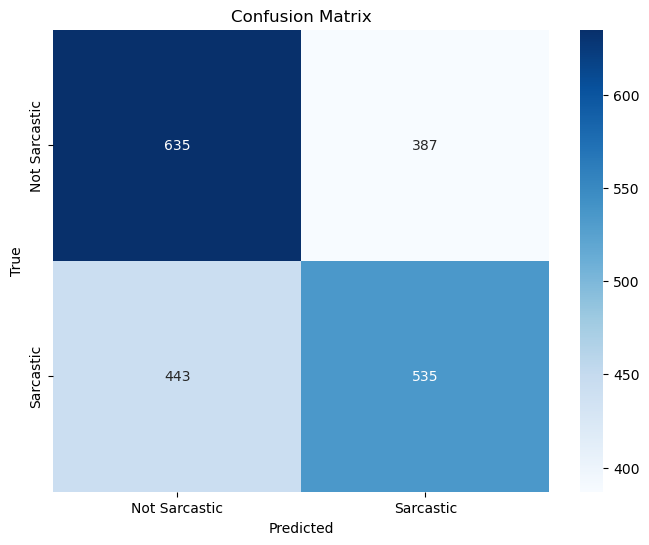

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the dataset


# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['combined'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Not Sarcastic', 'Sarcastic'])

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Classification Report:")
print(report)

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a chart
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sarcastic', 'Sarcastic'],
            yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset


# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['combined'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.5895
Confusion Matrix:
[[628 394]
 [427 551]]


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset


# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['comment'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.6545
Confusion Matrix:
[[670 301]
 [390 639]]


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset


# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(data['comment'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.6858
Confusion Matrix:
[[7266 2716]
 [3568 6450]]


In [ ]:
#### Testing the bert model

In [63]:

data['comment'] = data['comment'].apply(clean_data)

In [64]:
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,bushie the other bushie the next bushie the af...,selicos,politics,606,-1,-1,2016-10,2016-10-13 02:39:41,"Don't you mean, Bushie the Younger?"
1,1,congrats on getting such damage before they we...,SenGenketsu,Robocraft,1,-1,-1,2016-10,2016-10-27 16:51:51,"So, Flak will be a thing again? Than i have to..."
2,0,keeper of the grove too,pucykoks,hearthstone,14,14,0,2016-09,2016-09-13 21:33:07,Especially when you compare it to dalaran Mage...
3,1,nothis would be like my form of alcoholism cl...,redditzendave,politics,7,-1,-1,2016-10,2016-10-21 19:16:31,See It: Trump hires teen because she's beautif...
4,1,great input,Karieo,wow,2,2,0,2016-09,2016-09-19 20:54:15,you swap to druid.


In [121]:
data_sample = data.sample(n=10000, axis=0,random_state=42)

In [126]:
column_name = 'comment'
data_sample = data_sample.dropna(subset=[column_name])

In [127]:
data_sample['label'].value_counts()

1    5083
0    4916
Name: label, dtype: int64

In [128]:
import torch
torch.cuda.is_available()

False

In [129]:
from torch.utils.data import TensorDataset, DataLoader

In [130]:
from transformers import BertTokenizer
# Tokenize the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer(data_sample['comment'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Prepare labels
labels = torch.tensor(data_sample['label'].tolist())

In [131]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)

In [132]:
from torch.utils.data import TensorDataset, DataLoader

In [133]:
# Define a DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [134]:
from transformers import BertForSequenceClassification
# Load the pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [135]:
# Define the loss function and optimizer
import torch.nn as nn 
import torch.optim as optim
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-6)

In [136]:
from tqdm.notebook import tqdm  # Import tqdm for progress bar

# Training loop
model.train()
total_epochs = 5  # Adjust the number of epochs as needed

for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")
    
    # Use tqdm for a progress bar over the batches
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Epoch 1/5


Epoch 1:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 2/5


Epoch 2:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 3/5


Epoch 3:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 4/5


Epoch 4:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 5/5


Epoch 5:   0%|          | 0/500 [00:00<?, ?it/s]

In [137]:
model.eval()
with torch.no_grad():
    outputs = model(test_inputs, labels=test_labels)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

accuracy = (predicted_labels == test_labels).sum().item() / len(test_labels)
print('Accuracy:', accuracy)


Accuracy: 0.7025


In [139]:
test_labels

tensor([1, 0, 1,  ..., 1, 1, 0])

In [140]:
predicted_labels

tensor([1, 0, 1,  ..., 1, 1, 0])

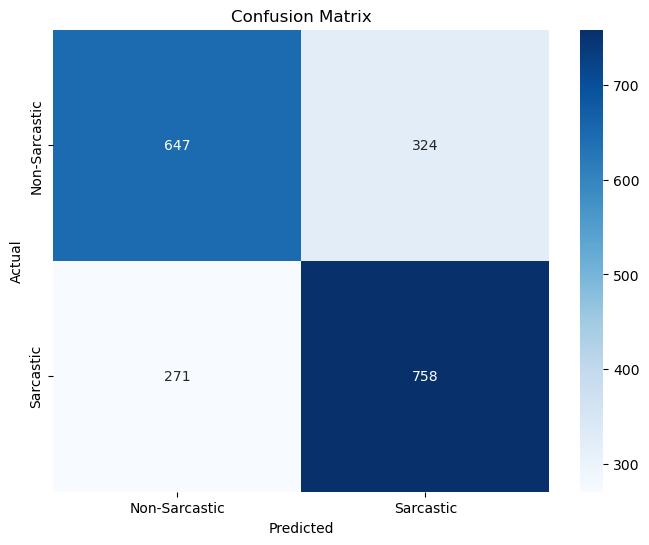

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Sarcastic', 'Sarcastic'],
            yticklabels=['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
